In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from ggplot import *
%matplotlib inline

In [2]:
drugs = pd.read_csv('34933-0001-Data.tsv',delimiter='\t',encoding='utf-8')

### Age When First Smoked a Cigarette

In [3]:
#Only people that explicitly stated that they have tried cigarettes
cig_try = drugs.CIGTRY[drugs.CIGTRY < 90]

In [4]:
cig_try.describe()

count    27520.000000
mean        15.506214
std          3.849068
min          1.000000
25%         13.000000
50%         15.000000
75%         18.000000
max         68.000000
Name: CIGTRY, dtype: float64

[0, 60, 0, 6500]

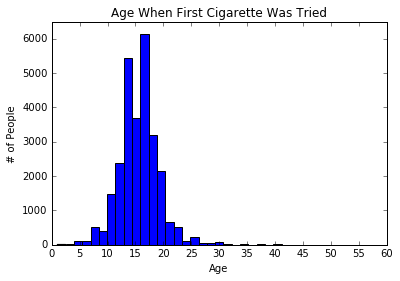

In [5]:
plt.rcParams["figure.figsize"] = [6.0, 4.0]
fig = plt.figure()
plt.hist(cig_try, 45)
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, 61, 5)
ax.set_xticks(major_ticks)
plt.title("Age When First Cigarette Was Tried")
plt.xlabel("Age")
plt.ylabel("# of People")
plt.axis([0, 60, 0, 6500])

### Number of Cigarettes Smoked in the Last 30 Days

In [6]:
#People that stated they have smoked within the last 30 days
cig_smoke_past_30 = drugs.CG30EST[drugs.CG30EST < 90]
cig_smoke_past_30.describe()

count    110.000000
mean       4.163636
std        1.784373
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        6.000000
Name: CG30EST, dtype: float64

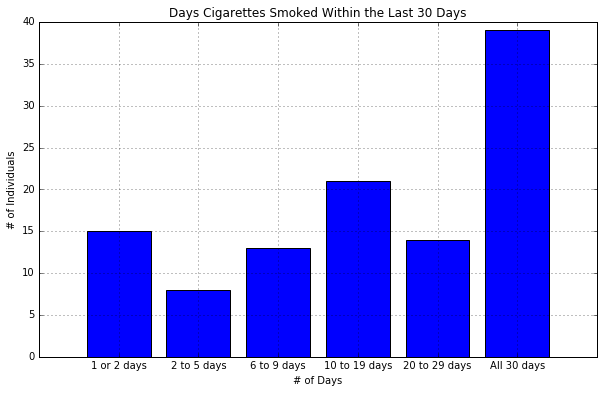

In [7]:
plt.rcParams["figure.figsize"] = [10.0, 6.0]
x = list(cig_smoke_past_30.value_counts().sort_index().index)
y = list(cig_smoke_past_30.value_counts().sort_index().values)
labels = ['1 or 2 days', '2 to 5 days', '6 to 9 days', '10 to 19 days', '20 to 29 days', 'All 30 days']
plt.bar(x, y, color="blue", align='center')
plt.xticks(x, labels)
plt.title("Days Cigarettes Smoked Within the Last 30 Days")
plt.xlabel("# of Days")
plt.ylabel("# of Individuals")
plt.grid(True)

### Days of Alcohol Use Within the Past Years

In [8]:
#Only people who have stated that they used alcohol within the past year
alc_year = drugs.ALCYRTOT[drugs.ALCYRTOT < 900]
alc_year.describe()

count    32366.000000
mean        74.463171
std         84.408165
min          1.000000
25%         10.000000
50%         48.000000
75%        104.000000
max        365.000000
Name: ALCYRTOT, dtype: float64

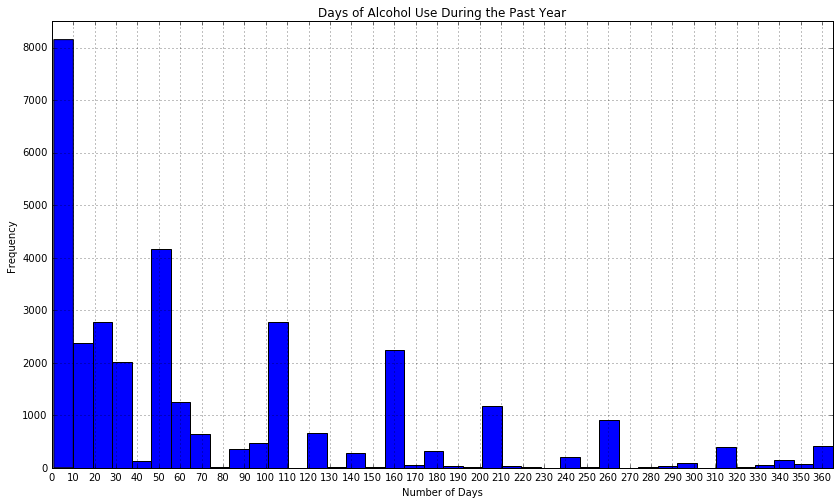

In [9]:
plt.rcParams["figure.figsize"] = [14.0, 8.0]
fig = plt.figure()
plt.hist(alc_year, 40, align='mid')
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, 367, 10)
ax.set_xticks(major_ticks)
plt.title("Days of Alcohol Use During the Past Year")
plt.xlabel("Number of Days")
plt.ylabel("Frequency")
plt.axis([0, 365, 0, 8500])
plt.grid(True)

### Ages for Trying Alcohol and Cigarettes

In [10]:
ages_try = drugs[['CIGTRY', 'ALCTRY']]
ages_try.head(5)

,CIGTRY,ALCTRY
0,991,15
1,991,18
2,991,991
3,13,12
4,11,17


In [11]:
#People that answered for both alcohol and cigarette ages
try_both = ages_try[(ages_try.CIGTRY < 90) & (ages_try.ALCTRY < 90)]
try_both.describe()

,CIGTRY,ALCTRY
count,25808.000000,25808.000000
mean,15.504805,15.876511
std,3.788380,3.517568
min,1.000000,1.000000
25%,13.000000,14.000000
50%,15.000000,16.000000
75%,18.000000,18.000000
max,68.000000,69.000000


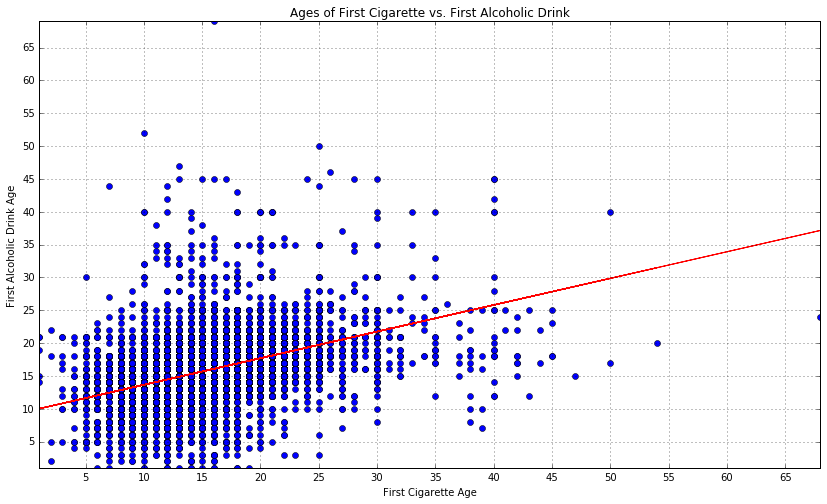

In [12]:
plt.rcParams["figure.figsize"] = [14.0, 8.0]
fig = plt.figure()
plt.plot(try_both['CIGTRY'], try_both['ALCTRY'], 'o')
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, 71, 5)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
fit = np.polyfit(try_both['CIGTRY'], try_both['ALCTRY'], deg=1)
ax.plot(try_both['CIGTRY'], fit[0] * try_both['CIGTRY'] + fit[1], color='red')
plt.title("Ages of First Cigarette vs. First Alcoholic Drink")
plt.xlabel("First Cigarette Age")
plt.ylabel("First Alcoholic Drink Age")
#plt.axis([0, 365, 0, 8500])
plt.grid(True)